In [1]:
import earthkit.data
import earthkit.plots
from earthkit.regrid import interpolate
from earthkit.plots.geo import domains

# Polytope Examples for Area
## Operational Forcast Data

<div style="border:2px solid #f39c12; background-color:#fcf8e3; padding:10px; border-radius:5px;">
  <strong>⚠️ Warning:</strong> Operational FDB only retains data for 2 days in the past.
</div>


## 1) Area Bounded

### Server side Regridding (reduced_gg -> lat/lon)

In [2]:
polytope_address = "polytope.ecmwf.int"

request_1 = {
    "class": "od",
    "date": "0",
    "expver": 1,
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "levtype": "sfc",
    "param": "151",
    "step": 0,
    "grid": "0.1/0.1", # regrid to lat lon because orig in reduced gaussian
    "area": "60/-20/40/5", #+N, -W, -S, +E
}
data_1 = earthkit.data.from_source(
    "polytope", "ecmwf-mars", request_1, address="polytope.ecmwf.int", stream=False)

2025-10-14 15:58:23 - INFO - Key read from /home/maes/.polytopeapirc
2025-10-14 15:58:23 - INFO - Sending request...
{'request': 'area: 60/-20/40/5\n'
            'class: od\n'
            "date: '0'\n"
            'expver: 1\n'
            'grid: 0.1/0.1\n'
            'levtype: sfc\n'
            "param: '151'\n"
            'step: 0\n'
            'stream: oper\n'
            "time: '00'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-10-14 15:58:23 - INFO - Polytope user key found in session cache for user maes
2025-10-14 15:58:23 - INFO - Request accepted. Please poll ./1f7c207d-e5d4-4eb6-a5a1-baff85e13d3c for status
2025-10-14 15:58:23 - INFO - Polytope user key found in session cache for user maes
2025-10-14 15:58:23 - INFO - Checking request status (1f7c207d-e5d4-4eb6-a5a1-baff85e13d3c)...
2025-10-14 15:58:23 - INFO - The current status of the request is 'queued'
2025-10-14 15:58:25 - INFO - The current status of the request is 'processing'
2025-10-14 15:58:27 - INFO - T

In [44]:
data_1.ls() # data returned in grib, gridType changed to regular in metadata

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20251012,0,0,fc,0,regular_ll


ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


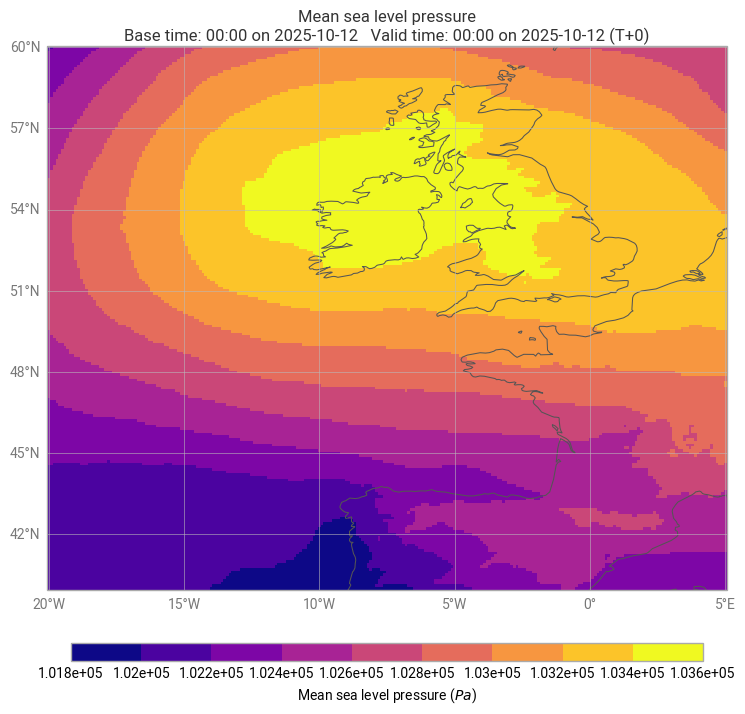

In [46]:
chart = earthkit.plots.Map()
chart.grid_cells(
    data_1
)
chart.legend()
chart.title()
chart.coastlines()
chart.gridlines()
chart.show()

## 2) Bounding Box Feature Request

### No regridding

In [47]:

polytope_address = "polytope.ecmwf.int"

request_2 = {
"class": "od",
    "date": "-1",
    "expver": 1,
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "levtype": "sfc",
    "param": "151",
    "step": 0,
    "feature": {
        "type": "boundingbox",
        "points" : [[60, -20], [40, 5]]  #top left (lat lon) #bottom right (lat, lon)
    },
}
data_2 = earthkit.data.from_source(
    "polytope", "ecmwf-mars", request_2, address="polytope.ecmwf.int", stream=False)

2025-10-12 11:52:27 - INFO - Key read from /home/maes/.polytopeapirc
2025-10-12 11:52:27 - INFO - Sending request...
{'request': 'class: od\n'
            "date: '-1'\n"
            'expver: 1\n'
            'feature:\n'
            '  points:\n'
            '  - - 60\n'
            '    - -20\n'
            '  - - 40\n'
            '    - 5\n'
            '  type: boundingbox\n'
            'levtype: sfc\n'
            "param: '151'\n"
            'step: 0\n'
            'stream: oper\n'
            "time: '00'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-10-12 11:52:27 - INFO - Polytope user key found in session cache for user maes
2025-10-12 11:52:27 - INFO - Request accepted. Please poll ./d0b69a4a-7618-4634-b70d-ffa1924c68a4 for status
2025-10-12 11:52:27 - INFO - Polytope user key found in session cache for user maes
2025-10-12 11:52:27 - INFO - Checking request status (d0b69a4a-7618-4634-b70d-ffa1924c68a4)...
2025-10-12 11:52:27 - INFO - The current status of the reque

In [51]:
data_2._json() # data is returned in CovJson Format

{'type': 'CoverageCollection',
 'domainType': 'MultiPoint',
 'coverages': [{'mars:metadata': {'class': 'od',
    'Forecast date': '2025-10-11T00:00:00Z',
    'domain': 'g',
    'expver': '0001',
    'levtype': 'sfc',
    'step': 0,
    'stream': 'oper',
    'type': 'fc',
    'number': 0},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'t': {'values': ['2025-10-11T00:00:00Z']},
     'composite': {'dataType': 'tuple',
      'coordinates': ['latitude', 'longitude', 'levelist'],
      'values': [[40.035148467108, 0.0, 0],
       [40.035148467108, 0.125874125874, 0],
       [40.035148467108, 0.251748251748, 0],
       [40.035148467108, 0.377622377622, 0],
       [40.035148467108, 0.503496503497, 0],
       [40.035148467108, 0.629370629371, 0],
       [40.035148467108, 0.755244755245, 0],
       [40.035148467108, 0.881118881119, 0],
       [40.035148467108, 1.006993006993, 0],
       [40.035148467108, 1.132867132867, 0],
       [40.035148467108, 1.258741258741, 0],
     

In [52]:
dx_2 = data_2.to_xarray()
dx_2

<xarray.Dataset> Size: 2MB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 45387)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-10-11T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 363kB 0 1 2 3 4 ... 45382 45383 45384 45385 45386
    latitude   (points) float64 363kB 40.04 40.04 40.04 40.04 ... 60.0 60.0 60.0
    longitude  (points) float64 363kB 0.0 0.1259 0.2517 ... 359.4 359.6 359.8
    levelist   (points) float64 363kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    msl        (datetimes, number, steps, points) float64 363kB 1.025e+05 ......
Attributes:
    class:          od
    Forecast date:  2025-10-11T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    step:           0
    stream:         oper
    type:           fc
    number:         0
    date:           2025-10-11T00:00:00Z

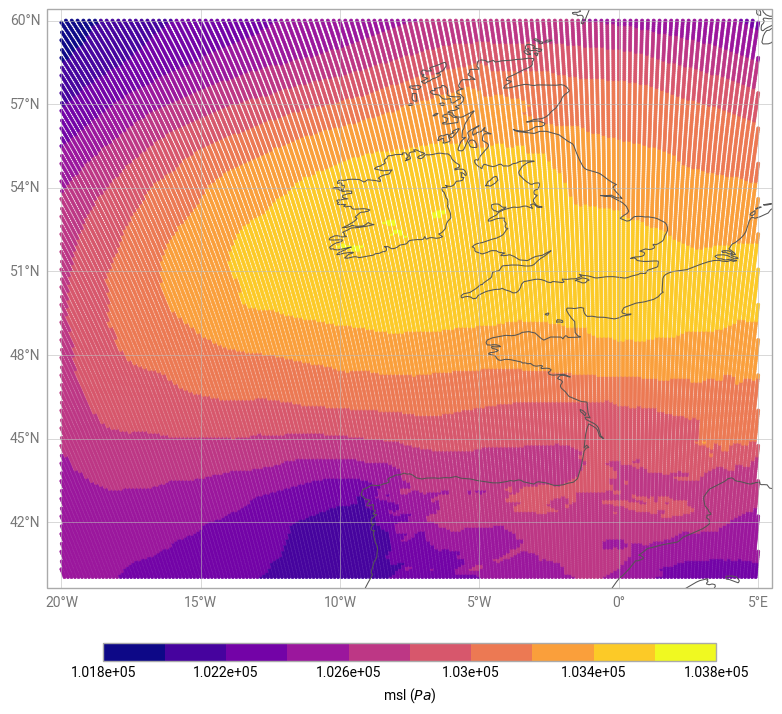

In [53]:
chart = earthkit.plots.Map()
chart.point_cloud(
    dx_2["msl"],
    x='longitude',
    y='latitude'
)
chart.legend()
chart.coastlines()
chart.gridlines()
chart.show()

## 3) Global Request, Area Bounded with Earthkit Plots Domain

### Client Side Regridding

In [54]:
request_3 = {
"class": "od",
    "date": "-1",
    "expver": 1,
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "levtype": "sfc",
    "param": "151",
    "step": 0,
}
data_3 = earthkit.data.from_source(
    "polytope", "ecmwf-mars", request_3, address="polytope.ecmwf.int", stream=False)

2025-10-12 11:53:31 - INFO - Key read from /home/maes/.polytopeapirc
2025-10-12 11:53:31 - INFO - Sending request...
{'request': 'class: od\n'
            "date: '-1'\n"
            'expver: 1\n'
            'levtype: sfc\n'
            "param: '151'\n"
            'step: 0\n'
            'stream: oper\n'
            "time: '00'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-10-12 11:53:31 - INFO - Polytope user key found in session cache for user maes
2025-10-12 11:53:32 - INFO - Request accepted. Please poll ./24db2a32-558a-46a4-acd3-601be2a1afdc for status
2025-10-12 11:53:32 - INFO - Polytope user key found in session cache for user maes
2025-10-12 11:53:32 - INFO - Checking request status (24db2a32-558a-46a4-acd3-601be2a1afdc)...
2025-10-12 11:53:32 - INFO - The current status of the request is 'queued'
2025-10-12 11:53:32 - INFO - The current status of the request is 'processing'
2025-10-12 11:53:34 - INFO - The current status of the request is 'processed'
               

In [55]:
data_3.ls() # original reduced gausian grid

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20251011,0,0,fc,0,reduced_gg


In [56]:
# Client Side Regridding
data_latlon = earthkit.regrid.interpolate(
    data_3,
    out_grid={"grid": [0.5, 0.5]},  # example: interpolate to 0.5°x0.5° lat-lon grid
    method="linear"
)

In [59]:
data_latlon.ls() # Now in regular grid

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20251011,0,0,fc,0,regular_ll


In [5]:
custom_domain = domains.Domain.from_bbox(
    bbox=[-20, 5, 40, 60], #x_min, x_max, y_min, y_max
)

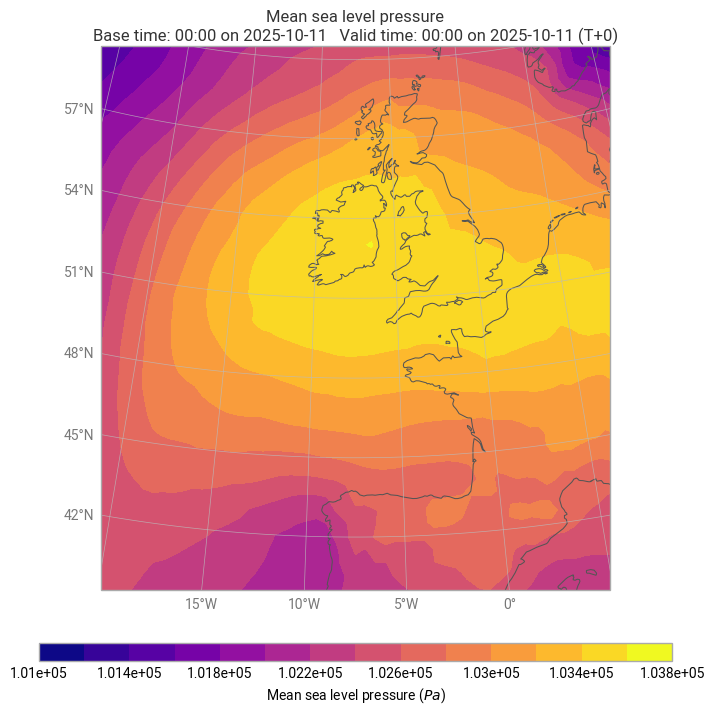

In [58]:
chart = earthkit.plots.Map(domain=custom_domain)
chart.contourf(
    data_latlon,
)
chart.legend()
chart.title()
chart.coastlines()
chart.gridlines()
chart.show()